In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [2]:
# Henter datasettet NAS.CSV og skriver det ut. 
nas_data = pd.read_csv('NAS.csv')
nas_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [3]:
# Ser at vi har NaN verdier i felter, og fjerner disse. 
nas_data = nas_data.dropna(axis="rows")

In [4]:
# Skriver ut datasettet en gang til, og ser at NaN verdiene er fjernet. 
nas_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [5]:
# Resetter nå ideksen og konverterer datatypen i kolonnen for dato fra string til datetime. 
nas_data = nas_data.reset_index(drop=True)
nas_data['Date'] = pd.to_datetime(nas_data['Date'])

In [6]:
def string_til_dag(str):
    str = pd.to_datetime(str)
    return np.array([(str-nas_data.Date[0]).days]).reshape(-1,1)

In [7]:
# Vi lager her en ny kolonne i tabellen som viser antall dager siden dag 0 (18-12-2003) for å kunne 
# bruke dette i polynomialregresjonen
antall_dager = nas_data.shape[0]
dager_diff = np.zeros((antall_dager,1))
for i in range(antall_dager):
    dager_diff[i] = (nas_data.Date[i]-nas_data.Date[0]).days
nas_data['Antall dager siden dag 0'] = dager_diff.astype(int)
nas_data

,Date,Open,High,Low,Close,Adj Close,Volume,Antall dager siden dag 0
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0,0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0,1
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0,4
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0,5
4,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0,11
...,...,...,...,...,...,...,...,...
4213,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0,6143
4214,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0,6144
4215,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0,6145
4216,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0,6146


In [8]:
# Velger nå hva vi skal hente ut av datasettet og bruke som x og y i modellen
x = nas_data['Antall dager siden dag 0'].values.reshape(-1,1)
y = nas_data['Close'].values.reshape(-1,1)

In [9]:
# Vi deler dataene inn i trening og testing, vi benytter 70% trening data og 30% testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 42)
# and, as we know, the answer to the universe and everything is 42 :)

In [10]:
# Lager nå den polynomiale regresjonsmodellen og trener den
polyReg = PolynomialFeatures(degree = 8)
x_polyReg_train = polyReg.fit_transform(x_train)
polyReg.fit(x_polyReg_train, y_train)
lin2 = LinearRegression().fit(x_polyReg_train,y_train)

In [11]:
# Ønsker nå å finne ut hvor nøyaktig modellen vår er
x_poly_test = polyReg.fit_transform(x_test)
y_poly_pred = lin2.predict(x_poly_test)

poly_mae = metrics.mean_absolute_error(y_test, y_poly_pred)
poly_mse = metrics.mean_squared_error(y_test, y_poly_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
poly_r2 = r2_score(y_test,y_poly_pred)

print(f'MAE = {poly_mae.round(2)}')
print(f'MSE = {poly_mse.round(2)}')
print(f'RMSE = {poly_rmse.round(2)}')
print(f'R2 = {poly_r2.round(2)}')

MAE = 20.09
MSE = 555.14
RMSE = 23.56
R2 = 0.81


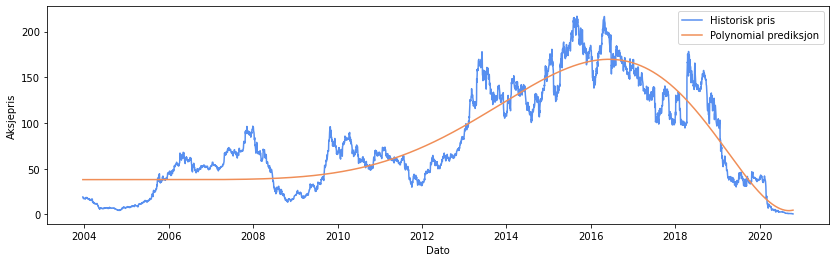

In [12]:
# Lager en grafisk fremstilling av modellen, med historisk pris og den polynomiale prediksjonen
y_poly_pred = lin2.predict(polyReg.fit_transform(x))
plt.figure(figsize=(14,4))
plt.plot(nas_data.Date,nas_data.Close, color = '#578FF0', label='Historisk pris')
plt.plot(nas_data.Date,y_poly_pred,color = '#F08E57', label='Polynomial prediksjon')
plt.xlabel('Dato')
plt.ylabel('Aksjepris')
plt.legend()
plt.show()

In [13]:
# Lager en fremtidid prediksjon av hva aksjeprisen vil være på en gitt dato
str_date = '2021-10-30'
prediction = int(lin2.predict(polyReg.fit_transform(string_til_dag(str_date))))
                 
print(f'Forventet pris per {str_date} er {prediction} NOK.') 

Forventet pris per 2021-10-30 er 105 NOK.
